<a href="https://colab.research.google.com/github/EvidenceN/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/Evidence%20N.%20Answers_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [1]:
##### Begin Working Here #####
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-10-02 03:42:04--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.62M   888KB/s    in 25s     

2019-10-02 03:42:30 (878 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22667400]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [4]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4122.15","4122.15","2081.76","2081.76","1477.85","603.91","0.0","0.0","0.0","Sep-2019","190.21","Oct-2019","Sep-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [5]:
import pandas as pd
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

loans = pd.read_csv('LoanStats_2018Q4.csv', header = 1, skipfooter=2, engine='python')
print(loans.shape)
loans.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Indi

In [6]:
loans.isnull().sum().sort_values()

inq_fi                                             0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
total_cu_tl                                        0
total_rev_hi_lim                                   0
max_bal_bc                                         0
open_rv_24m                                        0
open_rv_12m                                        0
total_bal_il                                       0
open_il_24m                                        0
hardship_flag                                      0
open_act_il                                        0
open_acc_6m                                        0
tot_cur_bal                                        0
tot_coll_amt                                       0
acc_now_delinq                                     0
application_type                              

In [0]:
loans = loans.drop(['url', 'member_id', 'desc', 'id'], axis = 1)

In [8]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,381100,3,3,2,2,4.0,64335,46.0,1,3,10115,58.0,66

In [9]:
loans['int_rate'][:10]

0     14.47%
1     16.14%
2     11.31%
3     12.98%
4     12.98%
5      7.56%
6     17.97%
7     14.47%
8     11.80%
9     17.97%
Name: int_rate, dtype: object

In [10]:
loans.dtypes[:10]

loan_amnt            int64
funded_amnt          int64
funded_amnt_inv    float64
term                object
int_rate            object
installment        float64
grade               object
sub_grade           object
emp_title           object
emp_length          object
dtype: object

In [11]:
int_rate = ' 15.02%'
int_rate

' 15.02%'

In [12]:
int_rate.strip()

'15.02%'

In [13]:
int_rate.strip().strip("%")

'15.02'

In [14]:
type(int_rate.strip().strip("%"))

str

In [15]:
int_rate.strip().strip('%')

'15.02'

In [16]:
float(int_rate.strip().strip("%"))

15.02

In [17]:
type(float(int_rate.strip().strip("%")))

float

In [18]:
def int_rate_to_float(int_rate):
  return float(int_rate.strip().strip("%"))

int_rate_to_float(int_rate)

15.02

In [19]:
loans['int_rate'].apply(int_rate_to_float)[:10]

0    14.47
1    16.14
2    11.31
3    12.98
4    12.98
5     7.56
6    17.97
7    14.47
8    11.80
9    17.97
Name: int_rate, dtype: float64

In [20]:
loans['int_rate_float'] = loans['int_rate'].apply(int_rate_to_float)
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,381100,3,3,2,2,4.0,6

In [21]:
loans.int_rate[:10]

0     14.47%
1     16.14%
2     11.31%
3     12.98%
4     12.98%
5      7.56%
6     17.97%
7     14.47%
8     11.80%
9     17.97%
Name: int_rate, dtype: object

In [22]:
loans['int_rate'][:10]

0     14.47%
1     16.14%
2     11.31%
3     12.98%
4     12.98%
5      7.56%
6     17.97%
7     14.47%
8     11.80%
9     17.97%
Name: int_rate, dtype: object

In [23]:
loans.dtypes[:10]

loan_amnt            int64
funded_amnt          int64
funded_amnt_inv    float64
term                object
int_rate            object
installment        float64
grade               object
sub_grade           object
emp_title           object
emp_length          object
dtype: object

In [24]:
loans['emp_title'].value_counts(dropna=False, ascending=False)[:20]

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [25]:
len(loans['emp_title'].value_counts())

43892

In [26]:
loans['emp_title'].value_counts().reset_index().head()

,index,emp_title
0,Teacher,2090
1,Manager,1773
2,Registered Nurse,952
3,Driver,924
4,RN,726


In [28]:
loans['emp_title'].value_counts().reset_index().shape

(43892, 2)

In [29]:
loans['emp_title'].isnull().sum()

20947

In [30]:
import numpy as np

type(np.NaN)

float

In [32]:
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

def clean_title(job):
  if isinstance(job, str):
    return job.strip().title()
  else:
    return "Unknown"
  
  
[clean_title(job) for job in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [33]:
loans['emp_title'] = loans['emp_title'].apply(clean_title)
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,381100,3,3,2,2,4.0,6

In [34]:
loans['emp_title'].value_counts(dropna=False, ascending=False)[:20]

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [35]:
len(loans['emp_title'].value_counts())

34902

In [36]:
loans['emp_title_manager'] = loans['emp_title'].str.contains('Manager')

loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN

In [37]:
condition = (loans['emp_title_manager'] == True)

managers = loans[loans['emp_title_manager'] == True]

print(managers.shape)
managers.head()

(17882, 142)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True
4,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,35000.00,1266.74,0.0,0.0,0.0,Apr-2019,34712.60,NaN,Sep-2019,0,NaN,1,Joint App,272421.0,15.89,Source Verified,0,0,420931,1,3,1,2,5.0,26570,51.0,0,2,24795,65.0,74700,1,6,1,4,32379.0,8677.0,85.5,0,0,152.0,399,21,5,6,21.0,77.0,12.0,77.0,0,6,8,6,11,14,9,19,8,13,0.0,0,0,1,97.4,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,True
8,12000,12000,12000.0,36 months,11.80%,397.43,B,B4,Transportation Manager,10+ years,RENT,79365.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,104xx,NY,29.70,0,Sep-1988,2,25.0,NaN,20,0,4957,27.8%,32,w,9383.91,9383.91,3565.070000,3565.07,2616.09,948.98,0.0,0.0,0.0,Se

In [40]:
(loans['emp_title_manager'] == False) & (loans['home_ownership']=='OWN')

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14         True
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24         True
25        False
26        False
27         True
28        False
29        False
30        False
31         True
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
50        False
51        False
52        False
53         True
54        False
55        False
56        False
57        False
58        False
59        False
60        False
61        False
62      

In [41]:
notmanagers =  loans[(loans['emp_title_manager'] == False) & (loans['home_ownership'] == 'MORTGAGE')]
print(notmanagers.shape)
notmanagers.head()

(53930, 142)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,381100,3,3,2,2,4.0,64335,46.0,1,3,10115,58.0,66700,2,1,7,6,22418.0,14577.0,70.4,0,0,114.0,144,3,3,4,22.0,NaN,2.0,NaN,0,8,10,9,10,7,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.31,False
3,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,39564,4,2,1,2,1.0,37895,92.0,3,6,725,36.0,17000,1,0,4,8,4946.0,15331.0,9.8,0,0,65.0,57,1,1,0,1.0,NaN,0.0,32.0,0,3,3,6,6,3,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,False
5,20000,20000,20000.0,36 months,7.56%,622.68,A,A3,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,982xx,WA,18.92,0,Feb-1999,0,48.0,NaN,9,0,25416,29.9%,19,w,0.00,0.00,20215.792430,20215.79,20000.00,215.79,0.0,0.0,0.0,Feb-2019,20228.39,NaN,Feb-2019,0,NaN,1,Joint App,190

In [42]:
managers['int_rate_float'].mean()


12.760582149647117

In [43]:
(notmanagers['int_rate_float'].mean())

12.576722603373335

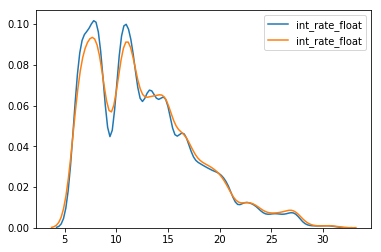

In [44]:
import seaborn as sns
sns.kdeplot(notmanagers['int_rate_float'])
sns.kdeplot(managers['int_rate_float']);

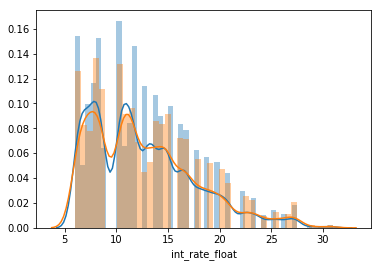

In [45]:
sns.distplot(notmanagers['int_rate_float'])
sns.distplot(managers['int_rate_float']);

In [46]:
list(loans.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',


In [47]:
[col for col in loans if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [48]:
loans.dtypes[:15]

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
dtype: object

In [49]:
loans['issue_d'][:10]

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
5    Dec-2018
6    Dec-2018
7    Dec-2018
8    Dec-2018
9    Dec-2018
Name: issue_d, dtype: object

In [50]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,N

In [51]:
loans['issue_d'][:10]

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
5   2018-12-01
6   2018-12-01
7   2018-12-01
8   2018-12-01
9   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [52]:
loans.dtypes[:15]

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
dtype: object

In [53]:
loans['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [54]:
loans['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
5         2018
6         2018
7         2018
8         2018
9         2018
10        2018
11        2018
12        2018
13        2018
14        2018
15        2018
16        2018
17        2018
18        2018
19        2018
20        2018
21        2018
22        2018
23        2018
24        2018
25        2018
26        2018
27        2018
28        2018
29        2018
30        2018
31        2018
32        2018
33        2018
34        2018
35        2018
36        2018
37        2018
38        2018
39        2018
40        2018
41        2018
42        2018
43        2018
44        2018
45        2018
46        2018
47        2018
48        2018
49        2018
50        2018
51        2018
52        2018
53        2018
54        2018
55        2018
56        2018
57        2018
58        2018
59        2018
60        2018
61        2018
62        2018
63        2018
64        2018
65        2018
66        

In [0]:
loans['issue_year'] = loans["issue_d"].dt.year

In [0]:
loans['issue_month'] = loans['issue_d'].dt.month

In [57]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager,issue_year,issue_month
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False,2018,12
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True,2018,12
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28

In [58]:
loans['earliest_cr_line'].head()

0    Jun-1979
1    Sep-2003
2    Dec-2006
3    Jul-2013
4    Sep-1985
Name: earliest_cr_line, dtype: object

In [0]:
loans['earliest_cr_line']=pd.to_datetime(loans['earliest_cr_line'], infer_datetime_format=True)

In [0]:
loans['days_from_earliest_credit_to_issue'] = (loans['issue_d'] - loans['earliest_cr_line'])

In [65]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False,2018,12,14428 days
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True,2018,12,5570 days
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,2006-12-01,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5

In [66]:
loans['days_from_earliest_credit_to_issue'].describe()

count                       128412
mean     5859 days 21:23:44.726660
std      2886 days 12:51:13.941888
min             1126 days 00:00:00
25%             4049 days 00:00:00
50%             5266 days 00:00:00
75%             7244 days 00:00:00
max            25171 days 00:00:00
Name: days_from_earliest_credit_to_issue, dtype: object

In [67]:
25171/365

68.96164383561644

Convert the ***term*** column from string to integers. 

In [68]:
loans.dtypes[:10]

loan_amnt            int64
funded_amnt          int64
funded_amnt_inv    float64
term                object
int_rate            object
installment        float64
grade               object
sub_grade           object
emp_title           object
emp_length          object
dtype: object

In [69]:
loans['term'][:20]

0      36 months
1      60 months
2      60 months
3      36 months
4      60 months
5      36 months
6      36 months
7      60 months
8      36 months
9      60 months
10     60 months
11     36 months
12     36 months
13     36 months
14     36 months
15     36 months
16     36 months
17     36 months
18     60 months
19     36 months
Name: term, dtype: object

In [70]:
loans['term'].isnull().sum()

0

In [0]:
example_term = ' 26 months'

In [72]:
example_term.strip('months').strip()

'26'

In [73]:
type(example_term.strip('months').strip())

str

In [74]:
float(example_term.strip('months').strip())

26.0

In [75]:
type(float(example_term.strip('months').strip()))

float

In [76]:
def term_to_integers(term):
  return float(term.strip('months').strip())

term_to_integers(example_term)

26.0

In [77]:
loans['term'].apply(term_to_integers)


0         36.0
1         60.0
2         60.0
3         36.0
4         60.0
5         36.0
6         36.0
7         60.0
8         36.0
9         60.0
10        60.0
11        36.0
12        36.0
13        36.0
14        36.0
15        36.0
16        36.0
17        36.0
18        60.0
19        36.0
20        60.0
21        36.0
22        60.0
23        36.0
24        60.0
25        60.0
26        60.0
27        36.0
28        36.0
29        60.0
30        36.0
31        60.0
32        36.0
33        60.0
34        36.0
35        36.0
36        36.0
37        36.0
38        36.0
39        36.0
40        60.0
41        60.0
42        36.0
43        36.0
44        36.0
45        36.0
46        36.0
47        60.0
48        36.0
49        60.0
50        36.0
51        60.0
52        36.0
53        36.0
54        60.0
55        60.0
56        36.0
57        36.0
58        36.0
59        36.0
60        36.0
61        60.0
62        60.0
63        36.0
64        36.0
65        36.0
66        

In [78]:
loans['int_term'] = loans['term'].apply(term_to_integers)

loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,int_term
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False,2018,12,14428 days,36.0
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True,2018,12,5570 days,60.0
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,2006-12-01,2,NaN,NaN,17,0,43640,65.4%,37,w,

Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

In [79]:
loans.dtypes[:20]

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dtype: object

In [80]:
loans['loan_status'][:20]

0        Current
1     Fully Paid
2        Current
3        Current
4     Fully Paid
5     Fully Paid
6        Current
7     Fully Paid
8        Current
9        Current
10    Fully Paid
11    Fully Paid
12       Current
13       Current
14       Current
15       Current
16       Current
17       Current
18    Fully Paid
19       Current
Name: loan_status, dtype: object

In [0]:
#condition =  (loans['loan_status'] == "Current") or (loans['loan_status'] == 'Fully Paid')

# first set the new column = to the old column
# then create a function and an "if statement" inside the function that conveys
# the condition described in the questions

# Then use .apply to apply the function to the new column created earlier

In [82]:
# first set the new column = to the old column
loans['loan_status_is_great'] = loans['loan_status']

loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,int_term,loan_status_is_great
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False,2018,12,14428 days,36.0,Current
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True,2018,12,5570 days,60.0,Fully Paid
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,200

In [0]:
# then create a function and an "if statement" inside the function that conveys
# the condition described in the questions

example_status = ["Current", 'Fully Paid', 'Something']


def loan_status(status):
  if status == "Current":
    return 1
  elif status == 'Fully Paid':
    return 1
  else:
    return 0
    

In [84]:
#Testing the new function with example list
[loan_status(status) for status in example_status]

[1, 1, 0]

In [0]:
# The first idea is not working. 
# Another idea. Create a new colum where if the condition is "Current" or "Fully Paid", then it will be TRUE
# else, then it would be false
# Then use dictionary mapping or a function to change TRUE and FALSE to 1 and 0
# Cancel that. After implementing the second idea, i found out that the first idea works. My only
# problem was that my list comprehension was wrong. i did loan_status(example_status) instead of 
# loan_status(status)
# The top code and bottom code should accomplish the same mission. 

In [86]:
loans['loan_status_is_great'] = loans['loan_status_is_great'].apply(loan_status)
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,int_term,loan_status_is_great
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False,2018,12,14428 days,36.0,1
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True,2018,12,5570 days,60.0,1
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,2006-12-01,2,NaN,N

In [87]:
loans['loan_status'].value_counts()

Current               105925
Fully Paid             15780
Charged Off             2863
Late (31-120 days)      2482
In Grace Period          901
Late (16-30 days)        459
Default                    2
Name: loan_status, dtype: int64

In [88]:
# I created a second version for differentiation purposes. 
loans['loan_status_is_great_2'] = loans['loan_status'].str.contains('Current|Fully Paid')
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,int_term,loan_status_is_great,loan_status_is_great_2
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False,2018,12,14428 days,36.0,1,True
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True,2018,12,5570 days,60.0,1,True
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,74

In [89]:
loans['loan_status_is_great_2'][30:32]

30     True
31    False
Name: loan_status_is_great_2, dtype: bool

In [90]:
# The True/False Method Worked
loans['loan_status'][30:32]

30        Current
31    Charged Off
Name: loan_status, dtype: object

In [0]:
def bool_to_int(number):
  if number == True:
    return 1
  else: 
    return 0
  

In [0]:
# Testing Function
bool_test = [True, False, True, True, False]

In [93]:
[bool_to_int(number) for number in bool_test]

[1, 0, 1, 1, 0]

In [94]:
loans['loan_status_is_great_2'] = loans['loan_status_is_great_2'].apply(bool_to_int)
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,int_term,loan_status_is_great,loan_status_is_great_2
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False,2018,12,14428 days,36.0,1,1
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True,2018,12,5570 days,60.0,1,1
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK

In [0]:
# Both solutions i came up with works for changing the loan status string to loan 
# status integer. I came up with 2 solutions because the way i implemented the solution
# the first time was wrong even though the solution structure/idea was correct.

Make last_pymnt_d_month and last_pymnt_d_year columns.

In [96]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,int_term,loan_status_is_great,loan_status_is_great_2
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False,2018,12,14428 days,36.0,1,1
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True,2018,12,5570 days,60.0,1,1
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK

In [97]:
loans['last_pymnt_d'][:10]

0    Sep-2019
1    Apr-2019
2    Sep-2019
3    Sep-2019
4    Apr-2019
5    Feb-2019
6    Sep-2019
7    Sep-2019
8    Sep-2019
9    Sep-2019
Name: last_pymnt_d, dtype: object

In [98]:
loans['last_pymnt_d'].value_counts(dropna=False)

Sep-2019    106772
Aug-2019      3590
Jul-2019      3227
May-2019      2550
Apr-2019      2354
Jun-2019      2323
Mar-2019      1984
Feb-2019      1915
Jan-2019      1561
Dec-2018      1054
Nov-2018       679
Oct-2018       234
NaN            159
Oct-2019        10
Name: last_pymnt_d, dtype: int64

In [0]:
loans['last_pymnt_d'] = loans['last_pymnt_d'].fillna(method='ffill')

In [100]:
loans['last_pymnt_d'] = pd.to_datetime(loans['last_pymnt_d'], infer_datetime_format=True)
loans['last_pymnt_d'][:10]

0   2019-09-01
1   2019-04-01
2   2019-09-01
3   2019-09-01
4   2019-04-01
5   2019-02-01
6   2019-09-01
7   2019-09-01
8   2019-09-01
9   2019-09-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [101]:
loans['last_pymnt_d_month'] = loans['last_pymnt_d'].dt.month
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,int_term,loan_status_is_great,loan_status_is_great_2,last_pymnt_d_month
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,2019-09-01,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False,2018,12,14428 days,36.0,1,1,9
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,2019-04-01,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True,2018,12,5570 days,60.0,1,1,4
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credi

In [102]:
loans['last_pymnt_d_year'] = loans['last_pymnt_d'].dt.year
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,int_term,loan_status_is_great,loan_status_is_great_2,last_pymnt_d_month,last_pymnt_d_year
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,2019-09-01,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,33157,0,2,1,1,8.0,18109,44.0,1,2,8628,73.0,20700,1,1,4,3,5526.0,5175.0,73.0,0,0,141.0,474,10,8,0,10.0,15.0,1.0,15.0,0,4,4,11,12,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,False,2018,12,14428 days,36.0,1,1,9,2019
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,2019-04-01,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1303,49524,0,2,1,2,7.0,40623,82.0,0,0,7830,67.0,24200,2,0,1,2,7075.0,10465.0,43.7,0,0,161.0,162,45,7,4,96.0,NaN,7.0,NaN,0,2,3,3,5,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,True,2018,12,5570 days,60.0,1,1,4,2019
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01